# Exercise 5: Classification Tree

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import random
import matplotlib.pyplot as plt
sb.set()

In [2]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Problem 1: Predicting CentralAir using SalePrice

### Creating appropriate datasets for Train and Test

In [3]:
air = pd.DataFrame(data["CentralAir"])
price = pd.DataFrame(data["SalePrice"])

In [4]:
from sklearn.model_selection import train_test_split

# Split the Legendary-Total Dataset into Train and Test
price_train, price_test, air_train, air_test = train_test_split(price, air, test_size = 0.20)

print("Train Set :", air_train.shape, price_train.shape)
print("Test Set  :", air_test.shape, price_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


### Creating Two Classification Tree Models

In [5]:
from sklearn.tree import DecisionTreeClassifier
max2tree = DecisionTreeClassifier(max_depth=2)
max2tree.fit(price_train, air_train)

max4tree = DecisionTreeClassifier(max_depth=4)
max4tree.fit(price_train, air_train)

DecisionTreeClassifier(max_depth=4)

### Printing Trees

[Text(0.5, 0.8333333333333334, 'Sale Price <= 98150.0\ngini = 0.131\nsamples = 1168\nvalue = [82, 1086]\nclass = Aircon'),
 Text(0.25, 0.5, 'Sale Price <= 62750.0\ngini = 0.496\nsamples = 86\nvalue = [39, 47]\nclass = Aircon'),
 Text(0.125, 0.16666666666666666, "gini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = Aircon't"),
 Text(0.375, 0.16666666666666666, 'gini = 0.481\nsamples = 77\nvalue = [31, 46]\nclass = Aircon'),
 Text(0.75, 0.5, 'Sale Price <= 137950.0\ngini = 0.076\nsamples = 1082\nvalue = [43, 1039]\nclass = Aircon'),
 Text(0.625, 0.16666666666666666, 'gini = 0.198\nsamples = 279\nvalue = [31, 248]\nclass = Aircon'),
 Text(0.875, 0.16666666666666666, 'gini = 0.029\nsamples = 803\nvalue = [12, 791]\nclass = Aircon')]

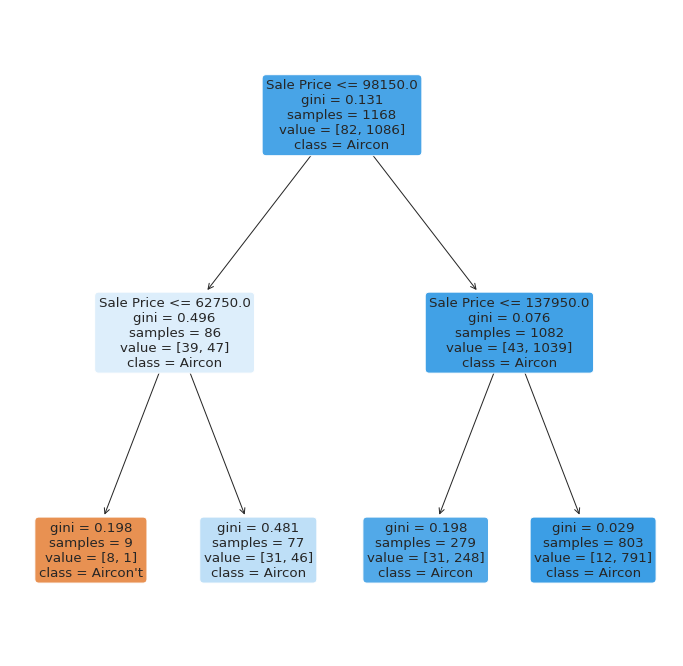

In [6]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(max2tree, filled=True, rounded=True, 
          feature_names=["Sale Price"], 
          class_names=["Aircon't","Aircon"])

[Text(0.4642857142857143, 0.9, 'Sale Price <= 98150.0\ngini = 0.131\nsamples = 1168\nvalue = [82, 1086]\nclass = Aircon'),
 Text(0.23809523809523808, 0.7, 'Sale Price <= 62750.0\ngini = 0.496\nsamples = 86\nvalue = [39, 47]\nclass = Aircon'),
 Text(0.09523809523809523, 0.5, "Sale Price <= 46000.0\ngini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = Aircon't"),
 Text(0.047619047619047616, 0.3, "gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Aircon't"),
 Text(0.14285714285714285, 0.3, "Sale Price <= 52250.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = Aircon't"),
 Text(0.09523809523809523, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Aircon'),
 Text(0.19047619047619047, 0.1, "gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Aircon't"),
 Text(0.38095238095238093, 0.5, 'Sale Price <= 97500.0\ngini = 0.481\nsamples = 77\nvalue = [31, 46]\nclass = Aircon'),
 Text(0.3333333333333333, 0.3, 'Sale Price <= 79250.0\ngini = 0.474\nsamples = 75\nvalue = [29, 46]\nclass = Aircon'),


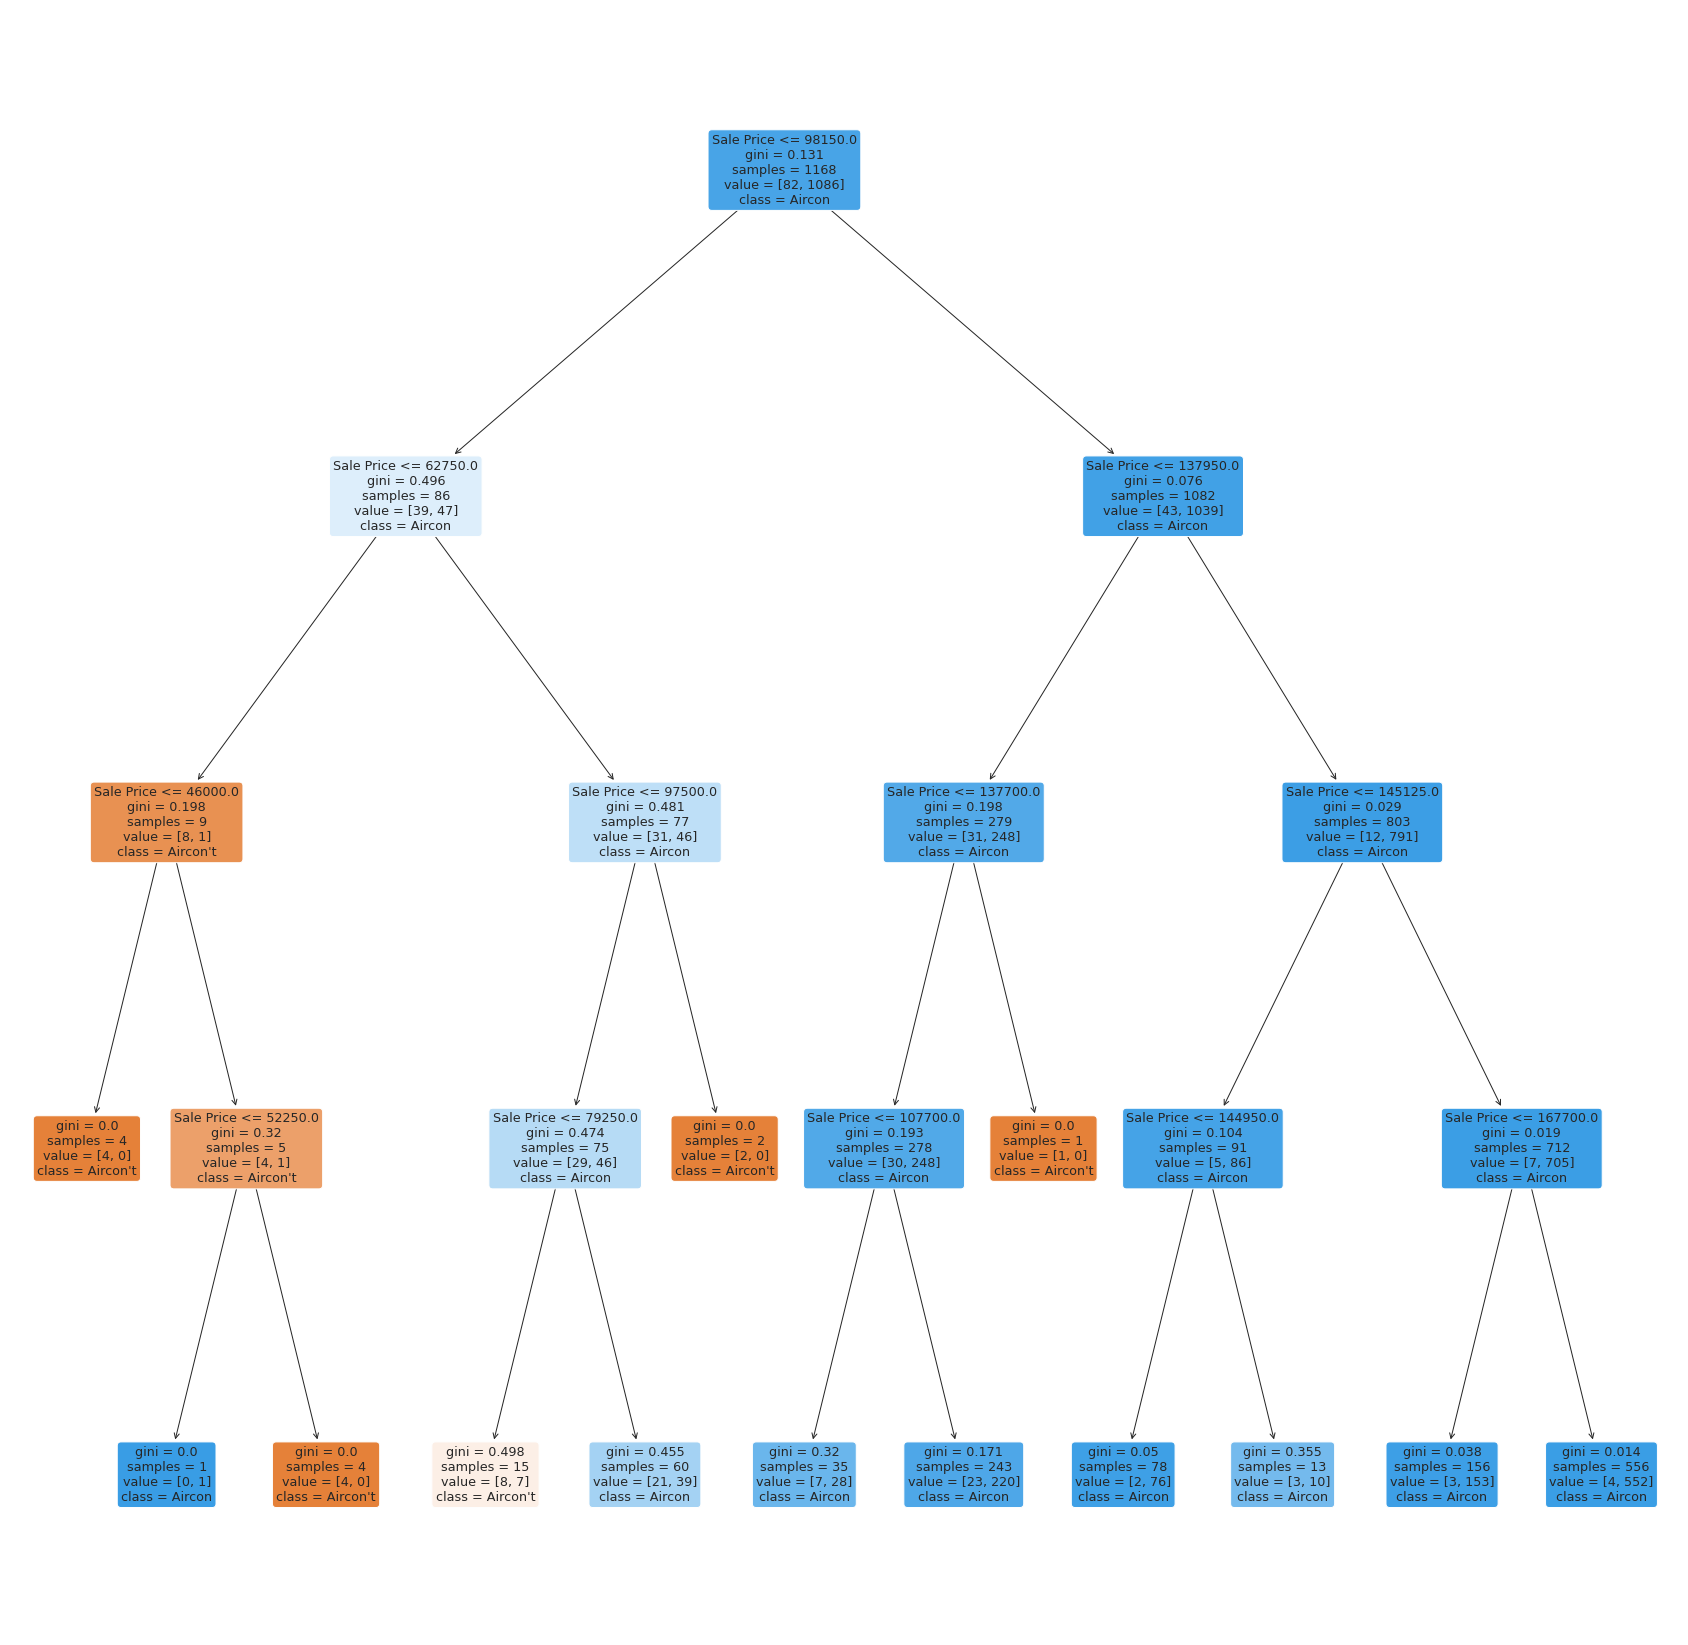

In [7]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(30,30))
plot_tree(max4tree, filled=True, rounded=True, 
          feature_names=["Sale Price"], 
          class_names=["Aircon't","Aircon"])

### Print Confusion Matrices

#### Max Depth 2 Tree Model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9357876712328768

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9657534246575342



<AxesSubplot:>

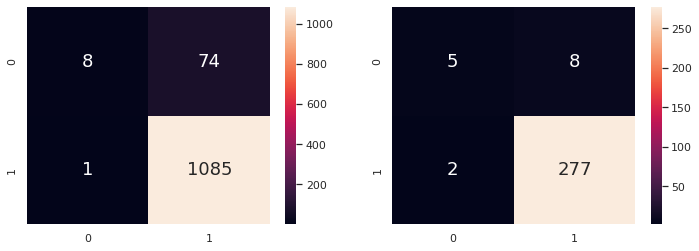

In [8]:
from sklearn.metrics import confusion_matrix

# Predict Legendary values corresponding to Total
air_train_pred = max2tree.predict(price_train)
air_test_pred = max2tree.predict(price_test)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", max2tree.score(price_train, air_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", max2tree.score(price_test, air_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(air_train, air_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(air_test, air_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

#### Max Depth 4 Tree Model

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.940068493150685

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9657534246575342



<AxesSubplot:>

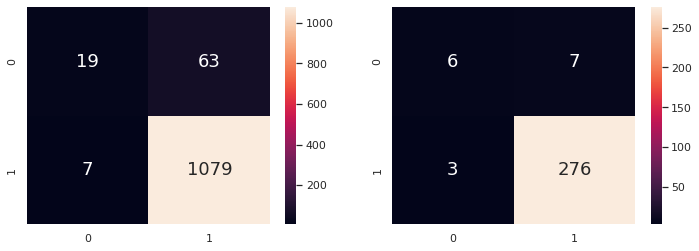

In [9]:
from sklearn.metrics import confusion_matrix

# Predict Legendary values corresponding to Total
air_train_pred = max4tree.predict(price_train)
air_test_pred = max4tree.predict(price_test)


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", max4tree.score(price_train, air_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", max4tree.score(price_test, air_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(air_train, air_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(air_test, air_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Problem 2: Predicting CentralAir using Other Variables

In [10]:
indexes = [i for i in range(len(data)-1)]
train_index = random.sample(indexes, int(80/100*len(data)))
test_index = [i for i in indexes if i not in train_index]

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9426369863013698

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9278350515463918



<AxesSubplot:>

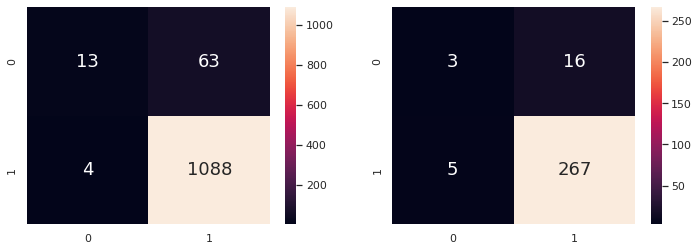

In [11]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Recall the air-qual Dataset
air = pd.DataFrame(data['CentralAir'])   # Response
qual = pd.DataFrame(data['OverallQual']) # Predictor

# Split the air-qual Dataset into Train and Test
X_train = qual.iloc[train_index]
X_test = qual.iloc[test_index]
y_train = air.iloc[train_index]
y_test = air.iloc[test_index]

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Qual
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9375

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9278350515463918



<AxesSubplot:>

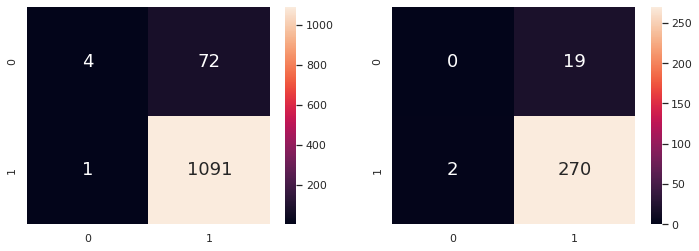

In [12]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the air-year Dataset
air = pd.DataFrame(data['CentralAir'])   # Response
year = pd.DataFrame(data['YearBuilt']) # Predictor

# Split the air-year Dataset into Train and Test
X_train = year.iloc[train_index]
X_test = year.iloc[test_index]
y_train = air.iloc[train_index]
y_test = air.iloc[test_index]

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Year
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Problem 3: Understanding the Misclassified Samples

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.946917808219178

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9383561643835616



<AxesSubplot:>

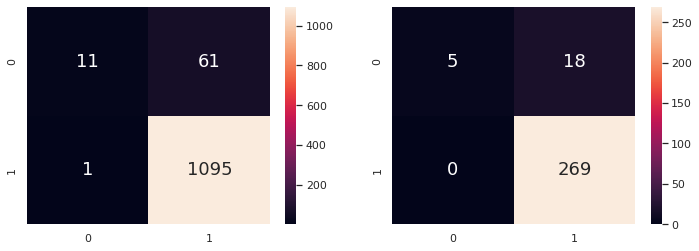

In [29]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

# Recall the Legendary-Total Dataset
air = pd.DataFrame(data['CentralAir'])   # Response
price = pd.DataFrame(data['SalePrice'])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(price, air, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Aircon values corresponding to Sale Price
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [30]:
f = plt.figure(figsize=(200,200))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Sale Price"], 
          class_names=["Aircon't","Aircon"])

[Text(0.4642857142857143, 0.9, 'Sale Price <= 98150.0\ngini = 0.116\nsamples = 1168\nvalue = [72, 1096]\nclass = Aircon'),
 Text(0.23809523809523808, 0.7, 'Sale Price <= 61691.5\ngini = 0.484\nsamples = 83\nvalue = [34, 49]\nclass = Aircon'),
 Text(0.09523809523809523, 0.5, "Sale Price <= 45650.0\ngini = 0.346\nsamples = 9\nvalue = [7, 2]\nclass = Aircon't"),
 Text(0.047619047619047616, 0.3, "gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Aircon't"),
 Text(0.14285714285714285, 0.3, "Sale Price <= 53500.0\ngini = 0.408\nsamples = 7\nvalue = [5, 2]\nclass = Aircon't"),
 Text(0.09523809523809523, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Aircon'),
 Text(0.19047619047619047, 0.1, "gini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = Aircon't"),
 Text(0.38095238095238093, 0.5, 'Sale Price <= 97750.0\ngini = 0.463\nsamples = 74\nvalue = [27, 47]\nclass = Aircon'),
 Text(0.3333333333333333, 0.3, 'Sale Price <= 96750.0\ngini = 0.448\nsamples = 71\nvalue = [24, 47]\nclass = Aircon'

In [34]:
combined = pd.concat([X_train,y_train], axis=1).reindex(y_train.index)
edited = combined[(combined.SalePrice <= 96750) & (combined.SalePrice >= 61691.5)]
edited

,SalePrice,CentralAir
250,76500,Y
1186,95000,Y
1279,68400,Y
1007,88000,Y
1179,93000,Y
...,...,...
325,87000,N
874,66500,Y
341,82000,Y
514,96500,N


## Question 3b

the False Positive cases are rows with CentralAir as N because it's Falsely declared as Y

In [36]:
edited[edited.CentralAir == "N"]

,SalePrice,CentralAir
1144,80000,N
155,79000,N
39,82000,N
1321,72500,N
88,85000,N
676,87000,N
29,68500,N
383,76000,N
1412,90000,N
998,91000,N
